<a href="https://colab.research.google.com/github/victordsrocha/Aprendizagem-de-Maquina-2021.1/blob/main/ML_Trabalho_Final_Regress%C3%A3o_Rede_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install seaborn

In [2]:
# import seaborn as sns
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

Get the data

In [3]:
dataset_path = 'https://github.com/victordsrocha/Aprendizagem-de-Maquina-2021.1/raw/main/dataset-1bola.csv'

# mantive todas as colunas para caso sejam úteis no futuro
column_names = ['bola_branca_x','bola_branca_y','bola_1_x','bola_1_y','tacada_x',
                'tacada_y','forca','out_bola_branca_x','out_bola_branca_y','out_bola_1_x',
                'out_bola_1_y','dist_custo1','dist_custo2','dist_custo3','dist_custo4',
                'colisao_x','colisao_y']

raw_dataset = pd.read_csv(dataset_path, names=column_names, sep=',')

# drop das colunas que não vamos utilizar
raw_dataset=raw_dataset.drop(columns=['forca','out_bola_branca_x','out_bola_branca_y','out_bola_1_x',
                'out_bola_1_y','dist_custo1','dist_custo2','dist_custo3','dist_custo4',
                'colisao_x','colisao_y'])

dataset = raw_dataset.copy()
dataset.tail()

,bola_branca_x,bola_branca_y,bola_1_x,bola_1_y,tacada_x,tacada_y
83911,0.211559,0.273849,0.069541,0.068641,-0.559838,-0.828602
83912,0.779373,0.386655,0.772425,0.212990,-0.070697,-0.997498
83913,0.797904,0.376335,0.753802,0.029519,-0.150995,-0.988534
83914,0.799908,0.253087,0.602778,0.141271,-0.857461,-0.514549
83915,0.446634,0.062459,0.940956,0.638424,0.656110,0.754666


Split the data into train and test

In [4]:
X = dataset.drop(columns=['tacada_x','tacada_y'])
y = pd.DataFrame({"arc_tangent":np.arctan(dataset['tacada_x'] / dataset['tacada_y']).T})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Inspect the data

In [5]:
# apresenta a descrição dos dados de treino - entrada
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bola_branca_x,67132.0,0.512318,0.255489,0.010084,0.305967,0.500139,0.726007,0.990000
bola_branca_y,67132.0,0.374178,0.194228,0.010083,0.216302,0.375000,0.531559,0.740000
bola_1_x,67132.0,0.517022,0.327201,0.009782,0.191748,0.540294,0.820357,0.991592
bola_1_y,67132.0,0.374911,0.231907,0.008124,0.153846,0.375000,0.596124,0.742211


In [6]:
# apresenta a descrição dos dados de treino - saída
y_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
arc_tangent,67132.0,-0.001666,0.885256,-1.57078,-0.813542,-0.007471,0.807088,1.570762


Normalize the data

In [7]:
# não testei se a normalização realmente ajuda

# normalização z-score de todos os dados

import numpy as np

def normalize_zscore(data):
    data_scaled = data
    data_mean = data_scaled.mean(axis=0)
    data_std = data_scaled.std(axis=0)
    data_scaled = (data_scaled - data_mean) / data_std
    return data_scaled

# X_train = normalize_zscore(X_train)
# X_test = normalize_zscore(X_test)
# y_train = normalize_zscore(y_train)
# y_test = normalize_zscore(y_test)

In [8]:
# apresenta a descrição dos dados de treino normalizados - entrada
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bola_branca_x,67132.0,0.512318,0.255489,0.010084,0.305967,0.500139,0.726007,0.990000
bola_branca_y,67132.0,0.374178,0.194228,0.010083,0.216302,0.375000,0.531559,0.740000
bola_1_x,67132.0,0.517022,0.327201,0.009782,0.191748,0.540294,0.820357,0.991592
bola_1_y,67132.0,0.374911,0.231907,0.008124,0.153846,0.375000,0.596124,0.742211


In [9]:
# apresenta a descrição dos dados de treino normalizados - saída
y_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
arc_tangent,67132.0,-0.001666,0.885256,-1.57078,-0.813542,-0.007471,0.807088,1.570762


Build the model

In [10]:
# dimensões de entrada e saída
in_dim = X_train.shape[1]
out_dim = y_train.shape[1]

# modelo
model = keras.models.Sequential()
model.add(layers.Dense(64, input_dim=in_dim, activation="relu"))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(out_dim))

optimizer = keras.optimizers.RMSprop(learning_rate=0.001)

model.compile(loss="mse", optimizer=optimizer, metrics=['mae','mse'])

# log tensorboard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logggs")

# early stop
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# sumário do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


Train the model

In [11]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), batch_size=128, verbose=1, callbacks=[early_stop, tensorboard_callback])

Epoch 1/1000
525/525 [==============================] - 2s 3ms/step - loss: 0.3360 - mae: 0.4119 - mse: 0.3360 - val_loss: 0.2141 - val_mae: 0.3008 - val_mse: 0.2141
Epoch 2/1000
525/525 [==============================] - 1s 3ms/step - loss: 0.1594 - mae: 0.2328 - mse: 0.1594 - val_loss: 0.1408 - val_mae: 0.2155 - val_mse: 0.1408
Epoch 3/1000
525/525 [==============================] - 1s 2ms/step - loss: 0.1129 - mae: 0.1770 - mse: 0.1129 - val_loss: 0.1000 - val_mae: 0.1563 - val_mse: 0.1000
Epoch 4/1000
525/525 [==============================] - 1s 3ms/step - loss: 0.0917 - mae: 0.1501 - mse: 0.0917 - val_loss: 0.0852 - val_mae: 0.1261 - val_mse: 0.0852
Epoch 5/1000
525/525 [==============================] - 2s 3ms/step - loss: 0.0798 - mae: 0.1346 - mse: 0.0798 - val_loss: 0.0727 - val_mae: 0.1071 - val_mse: 0.0727
Epoch 6/1000
525/525 [==============================] - 1s 3ms/step - loss: 0.0726 - mae: 0.1254 - mse: 0.0726 - val_loss: 0.0751 - val_mae: 0.1346 - val_mse: 0.0751
Epoc

In [12]:
# Comandos para fazer download da pasta de logs para o tensorboard

"""
!zip -r /content/file.zip /content/logggs
from google.colab import files
files.download("/content/file.zip")
"""

'\n!zip -r /content/file.zip /content/logggs\nfrom google.colab import files\nfiles.download("/content/file.zip")\n'

Plot

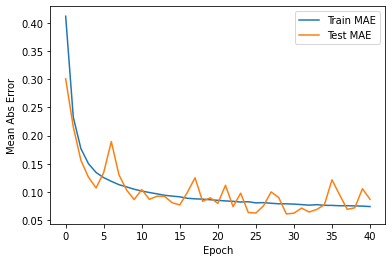

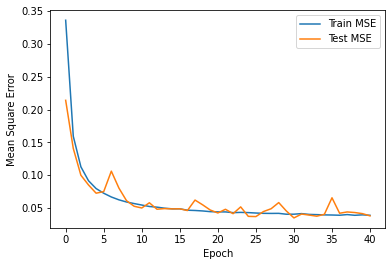

In [13]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'], label='Train MAE')
  plt.plot(hist['epoch'], hist['val_mae'], label='Test MAE')
  plt.legend()
  #plt.ylim([0,5])

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'], label='Train MSE')
  plt.plot(hist['epoch'], hist['val_mse'], label='Test MSE')
  plt.legend()
  #plt.ylim([0,20])

plot_history(history)

